In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.backend as K
from keras.utils.np_utils import to_categorical
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('Fertilizer.csv')

In [4]:
# Remove Missing Values
na = pd.notnull(df["Fertilizer"])
df = df[na]

In [5]:
df = df[["Fertilizer", "Temperature", "Humidity",
         "Moisture", "Soil_Type", "Crop_Type", "Nitrogen", "Potassium", "Phosphorous"]]

In [6]:
df.loc[df["Fertilizer"] == "Urea", "Fertilizer"] = 1
df.loc[df["Fertilizer"] == "DAP", "Fertilizer"] = 2
df.loc[df["Fertilizer"] == "28-28", "Fertilizer"] = 3
df.loc[df["Fertilizer"] == "14-35-14", "Fertilizer"] = 4
df.loc[df["Fertilizer"] == "20-20", "Fertilizer"] = 5
df.loc[df["Fertilizer"] == "17-17-17", "Fertilizer"] = 6
df.loc[df["Fertilizer"] == "10-26-26", "Fertilizer"] = 7

In [7]:
df.loc[df["Soil_Type"] == "Loamy", "Soil_Type"] = 1
df.loc[df["Soil_Type"] == "Sandy", "Soil_Type"] = 2
df.loc[df["Soil_Type"] == "Clayey", "Soil_Type"] = 3
df.loc[df["Soil_Type"] == "Black", "Soil_Type"] = 4
df.loc[df["Soil_Type"] == "Red", "Soil_Type"] = 5

In [8]:
df.loc[df["Crop_Type"] == "Sugarcane", "Crop_Type"] = 1
df.loc[df["Crop_Type"] == "Cotton", "Crop_Type"] = 2
df.loc[df["Crop_Type"] == "Millets", "Crop_Type"] = 3
df.loc[df["Crop_Type"] == "Paddy", "Crop_Type"] = 4
df.loc[df["Crop_Type"] == "Pulses", "Crop_Type"] = 5
df.loc[df["Crop_Type"] == "Wheat", "Crop_Type"] = 6
df.loc[df["Crop_Type"] == "Tobacco", "Crop_Type"] = 7
df.loc[df["Crop_Type"] == "Barley", "Crop_Type"] = 8
df.loc[df["Crop_Type"] == "Oil seeds", "Crop_Type"] = 9
df.loc[df["Crop_Type"] == "Ground Nuts", "Crop_Type"] = 10
df.loc[df["Crop_Type"] == "Maize", "Crop_Type"] = 11

In [9]:
from sklearn.preprocessing import StandardScaler
x = df.drop("Fertilizer", axis=1)
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = df["Fertilizer"]

In [10]:
y_cat = to_categorical(y)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x.values, y_cat, test_size=0.2)

In [12]:
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation="softmax"))
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

In [13]:
model.summary()
model.fit(x_train, y_train, verbose=1, epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 1,608
Trainable params: 1,608
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 2.1583 - accuracy: 0.1646
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 2.1548 - accuracy:

In [14]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred_class = np.argmax(model.predict(x_test), axis=-1)
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
print(classification_report(y_test_class, y_pred_class))
confusion_matrix(y_test_class, y_pred_class)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.85        20
   macro avg       0.68      0.71      0.69        20
weighted avg       0.81      0.85      0.83        20



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

array([[3, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0]], dtype=int64)

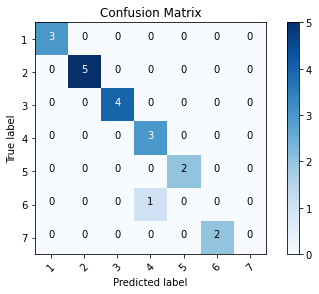

In [16]:
cm = confusion_matrix(y_test_class, y_pred_class)
cm_plot_labels = ['1', '2', '3', '4', '5', '6', '7']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [17]:
a2D = np.array([[26, 52, 38, 2, 11, 37, 0, 0]])


predictions = model.predict(a2D)
y_pred_new = np.argmax(model.predict(a2D), axis=-1)

print(y_pred_new)


[1]


In [18]:
#model.save('model-f.h5')